**PCA is a transformation of the data and attempts to find out what features explain the most variance in that data.**

# Imports

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [193]:
from sklearn.datasets import load_breast_cancer

In [194]:
cancer = load_breast_cancer()

In [195]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [196]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [197]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization

It is difficult to visualize high dimensional data,so we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

## Data Normalization

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()

In [200]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [201]:
scaled_data = scaler.transform(df)

In [202]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Principal Component Analysis

In [203]:
from sklearn.decomposition import PCA

In [204]:
pca = PCA(n_components=2)

In [205]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [206]:
x_pca = pca.transform(scaled_data)

transform the data to its first 2 principal components

In [207]:
x_pca.shape

(569, 2)

In [208]:
x_pca[0]

array([9.19283683, 1.94858307])

we have reduced 30 dimensions to just 2!

Text(0,0.5,'Second Principal Component')

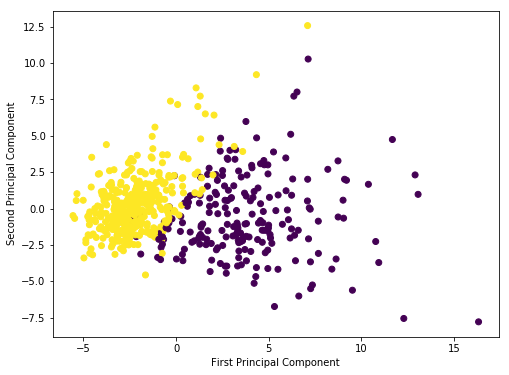

In [209]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

By using these 2 components we can easily seperate these 2 classes

In [210]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy array, each row represents a principal component, and each column relates back to the original features. Lets visualize this relationship with a heatmap:

In [211]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

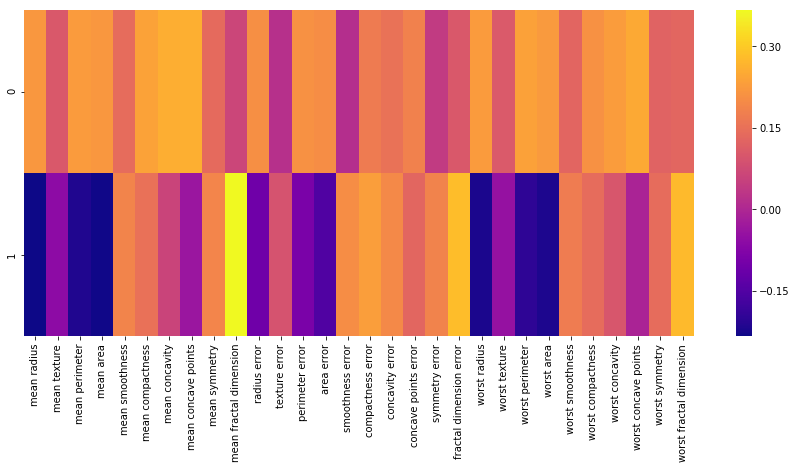

In [212]:
plt.figure(figsize=(15,6))
sns.heatmap(df_comp,cmap='plasma')

This heatmap represents the correlation between the various features and the principal component itself

In [213]:
scaled_df_pca = pd.DataFrame(x_pca,columns=['first principal component','second principle component'])

# Train Test Split

In [214]:
X = scaled_df_pca
y = cancer['target']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create and Train Support Vector Machines Model

In [217]:
from sklearn.svm import SVC

In [218]:
svc = SVC()

In [219]:
print(X_train.shape)
print(y_train.shape)

(398, 2)
(398,)


In [220]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Prediction and Evaluation

In [221]:
pred = svc.predict(X_test)

In [222]:
pred.shape

(171,)

In [223]:
from sklearn.metrics import classification_report,confusion_matrix

In [224]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[64  5]
 [ 9 93]]
             precision    recall  f1-score   support

          0       0.88      0.93      0.90        69
          1       0.95      0.91      0.93       102

avg / total       0.92      0.92      0.92       171



# Grid Search

__Using Grid Search, search for the best parameter values by trying out all the value combinations and get the ones which yield maximum accuracy__

In [225]:
from sklearn.grid_search import GridSearchCV

In [226]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'gamma':[0.001,0.01,0.1,1,10,100,1000]}

In [227]:
grid = GridSearchCV(SVC(),param_grid=param_grid,verbose=3)

In [228]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.639098 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.639098 -   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................... C=0.001, gamma=0.001, score=0.643939 -   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .................... C=0.001, gamma=0.01, score=0.639098 -   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .................... C=0.001, gamma=0.01, score=0.639098 -   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .................... C=0.001, gamma=0.01, score=0.643939 -   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.01, gamma=0.01, score=0.639098 -   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ..................... C=0.01, gamma=0.01, score=0.643939 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................... C=0.01, gamma=0.1, score=0.639098 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................... C=0.01, gamma=0.1, score=0.639098 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................... C=0.01, gamma=0.1, score=0.643939 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................ C=0.01, gamma=1, score=0.639098 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........................ C=0.01, gamma=1, score=0.639098 -   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .

[CV] ......................... C=10, gamma=10, score=0.872180 -   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ......................... C=10, gamma=10, score=0.795455 -   0.0s
[CV] C=10, gamma=100 .................................................
[CV] ........................ C=10, gamma=100, score=0.624060 -   0.0s
[CV] C=10, gamma=100 .................................................
[CV] ........................ C=10, gamma=100, score=0.631579 -   0.0s
[CV] C=10, gamma=100 .................................................
[CV] ........................ C=10, gamma=100, score=0.643939 -   0.0s
[CV] C=10, gamma=1000 ................................................
[CV] ....................... C=10, gamma=1000, score=0.639098 -   0.0s
[CV] C=10, gamma=1000 ................................................
[CV] ....................... C=10, gamma=1000, score=0.639098 -   0.0s
[CV] C=10, gamma=1000 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [229]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [230]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [231]:
grid.best_score_

0.9522613065326633

# Prediction and Evaluation

In [232]:
pred_grid = grid.predict(X_test)

In [233]:
print(confusion_matrix(y_test,pred_grid))
print('\n')
print(classification_report(y_test,pred_grid))

[[63  6]
 [ 6 96]]


             precision    recall  f1-score   support

          0       0.91      0.91      0.91        69
          1       0.94      0.94      0.94       102

avg / total       0.93      0.93      0.93       171



# Conclusion

We used Principle Component Analysis to reduce the features dimension from 30 to just 2 and then created and trained Support Vector Machines model with best parameters (thanks to Grid Search) to predict the correct cancer class with close to 93% accuracy.

This 93% accuracy is with just 2 features compared to 98% accuracy with 30 features (Not Bad! I must say)